In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import math

# interactive widgets
import ipywidgets as widgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = 20, 10
plt.style.use('dark_background')

In [2]:
def gauss(x, A, s, m):
    return A * (np.exp(-(x-m)**2/(2*(s**2))))

def gen_signal(A, s, m, Nm, Nstd, size = 200):

    x_arr = np.arange(0,size)
    noise = np.random.normal(Nm, Nstd, size)
    y_arr = np.array([gauss(x, A, s, m) for x in x_arr])

    y_arr = np.add(y_arr, noise)

    return x_arr,y_arr

def cool_plot(x,y, colour = 'yellow', label = 'plot'):

    plt.scatter(x,y, color=colour, label = label, s = 1.5, marker = 'X')
    
    plt.grid(True, which='both', linestyle='-', linewidth=0.75, color='gray')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25) 

    plt.legend()

def grid_it():
    plt.grid(True, which='both', linestyle='-', linewidth=0.75, color='gray')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25) 
    plt.legend()

def moving_average(x_array, y_array, window):

    new_x      = []
    avr_array = []
    for i in range(window, len(y_array) - window):

        new_x.append(x_array[i])
        
        val = 0
        for j in range(1, window):
            val+= y_array[i+j]
            val+=y_array[i-j]
        val+= y_array[i]
        avr_array.append(val/(window*2 +1))
    
    return new_x, avr_array

In [ ]:
## gaussian kernel
s = 18
A = 1 / (s * np.sqrt(2 * np.pi))

# signal peak parameters
s_p = 60; m_p = 300; A_p = 1

# noise parameters
Nm = 0; Nstd = 2; size = 800
data           = gen_signal(A_p, s_p, m_p, Nm, Nstd, size=size)
noise_data = Nstd * np.random.randn(size)
fact = 3
template = gen_signal(A, s, (s*fact)/2, 0, 0, size = (s*fact))
#template = gen_signal(4.5, 30, 75, 0, 0, size = 150)

step = 20

half_wind = 25
x, y = moving_average(data[0], data[1], half_wind)
cool_plot(x, y,  colour='cyan', label=f'Moving Average window: {half_wind*2}');
cool_plot(data[0],data[1], label = 'Data')

X = x; Y = y

half_wind = int(half_wind + step)
x, y = moving_average(data[0], data[1], half_wind)
cool_plot(x, y,  colour='greenyellow', label=f'Moving Average window: {half_wind*2}');

half_wind = int(half_wind + step)
x, y = moving_average(data[0], data[1], half_wind)
cool_plot(x, y,  colour='fuchsia', label=f'Moving Average window: {half_wind*2}');

half_wind = int(half_wind + step)
x, y = moving_average(data[0], data[1], half_wind)
cool_plot(x, y,  colour='lime', label=f'Moving Average window: {half_wind*2}');

plt.title('Moving Average', fontsize=30)
plt.show();

plt.hist(y, color = 'yellow', bins = 40);
#plt.hist(noise_data[1], color = 'red', bins = 40, alpha=0.5);
plt.grid("on");
plt.show();

# ---- #

conv_data = signal.convolve(data[1], template[1], mode = 'same')
new_len = len(conv_data)
x_conv = np.arange(0, new_len)

cool_plot(data[0],data[1], label = 'Data')

cool_plot(x_conv, conv_data, label = 'Filtered Data')
plt.title('Gaussian Filter', fontsize=30)
plt.show();

plt.hist(conv_data, color = 'yellow', bins = 40)
#plt.hist(noise_data[1], color = 'red', bins = 40, alpha=0.5);
plt.grid("on")
plt.show();

# -- fit -- #

popt, pcov = curve_fit(gauss, data[0], data[1], p0 = [1, 50, 300])
plt.scatter(data[0], gauss(data[0], *popt), color ='cyan', label = 'best fit', s = 1)
plt.scatter(data[0], gauss(data[0], A_p, s_p, m_p), color = 'red', label = 'signal', s = 1)
plt.scatter(data[0], data[1], color = 'yellow', label = 'data', s = 1)
plt.scatter(X,Y, color = 'greenyellow', label = 'moving average', s = 1)
plt.scatter(x_conv, conv_data, label = 'Gaussian Filter', color = 'fuchsia', s = 1)
grid_it()

sig = [gauss(x, A_p, s_p, m_p) for x in range(800)]

mean = np.mean(sig); print(mean)
noise_std = np.std(noise_data[1]); print(noise_std)
snr = mean/noise_std
print(f'SNR: {snr}')

/tmp/ipykernel_87990/3481305564.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


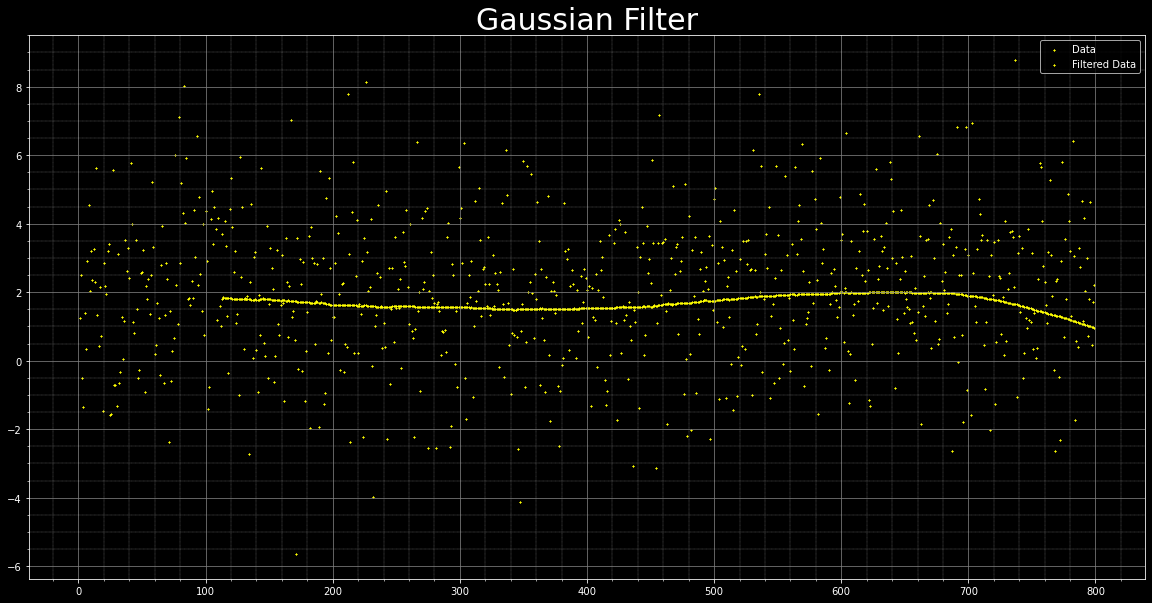

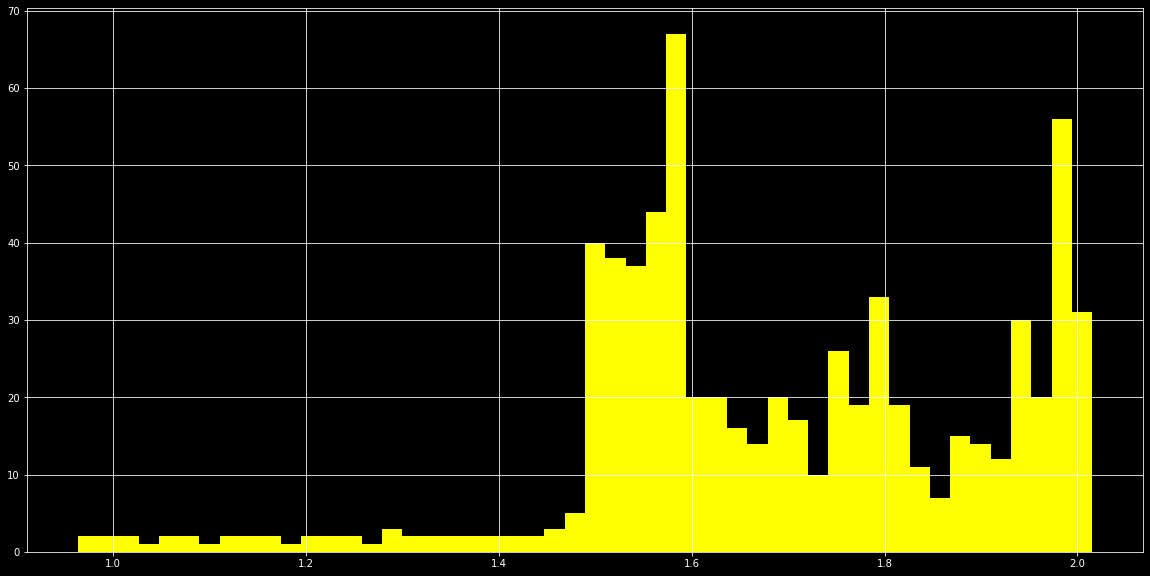

In [11]:
conv_data = signal.convolve(noise_data[1], template[1], mode = 'same')
new_len = len(conv_data)
x_conv = np.arange(0, new_len)

cool_plot(data[0],noise_data[1], label = 'Data')

cool_plot(x_conv, conv_data, label = 'Filtered Data')
plt.title('Gaussian Filter', fontsize=30)
plt.show();

plt.hist(conv_data, color = 'yellow', bins = 50)
plt.grid("on")

/tmp/ipykernel_41514/3481305564.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


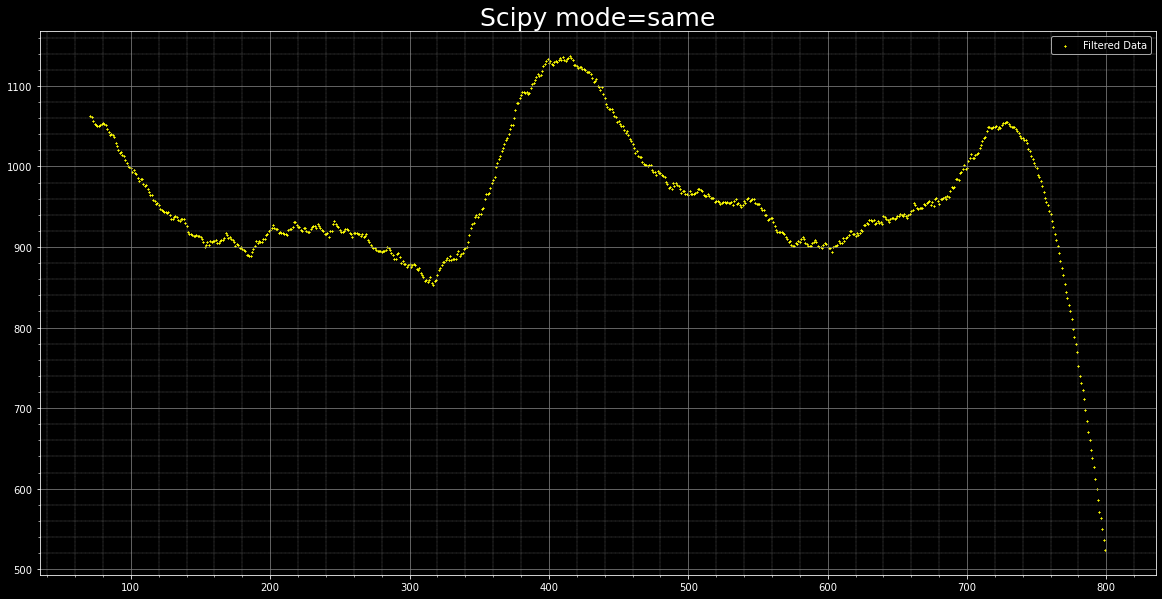

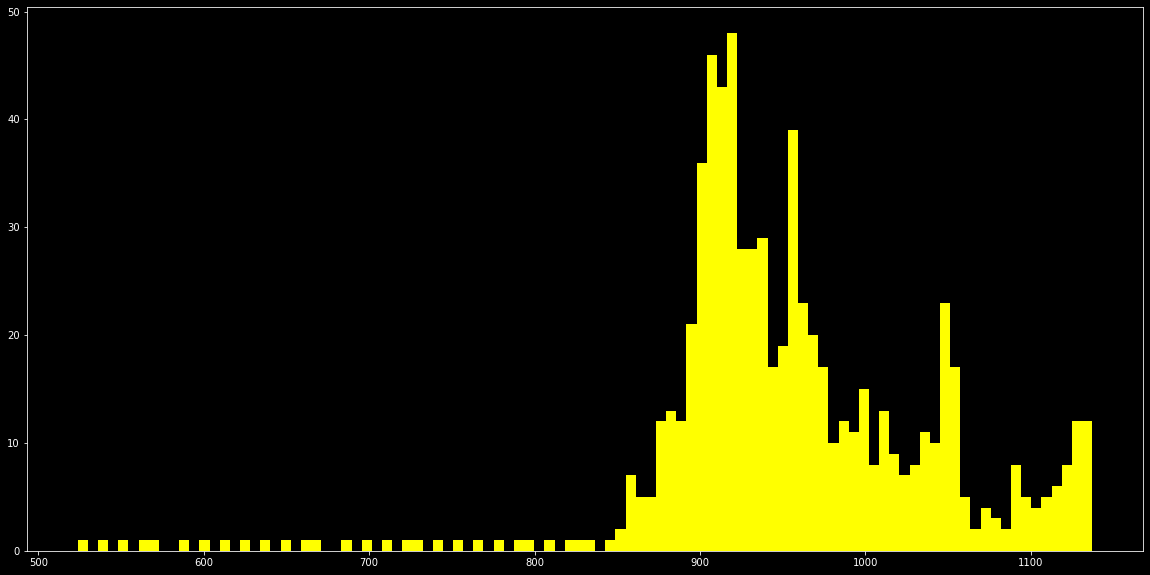

In [270]:
conv_data = signal.convolve(noise_data[1], template[1], mode = 'same')
new_len = len(conv_data)
x_conv = np.arange(0, new_len)
cool_plot(x_conv, conv_data, label = 'Filtered Data')
plt.title('Scipy mode=same', fontsize=25)
plt.show();

plt.hist(conv_data, color = 'yellow', bins = 100);

/tmp/ipykernel_60414/3481305564.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


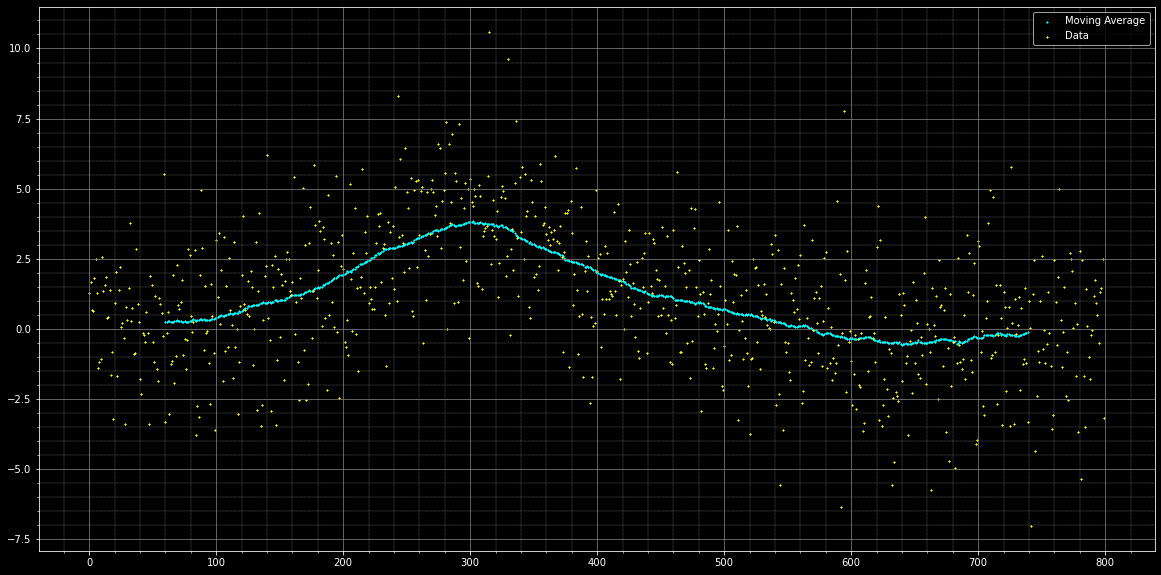

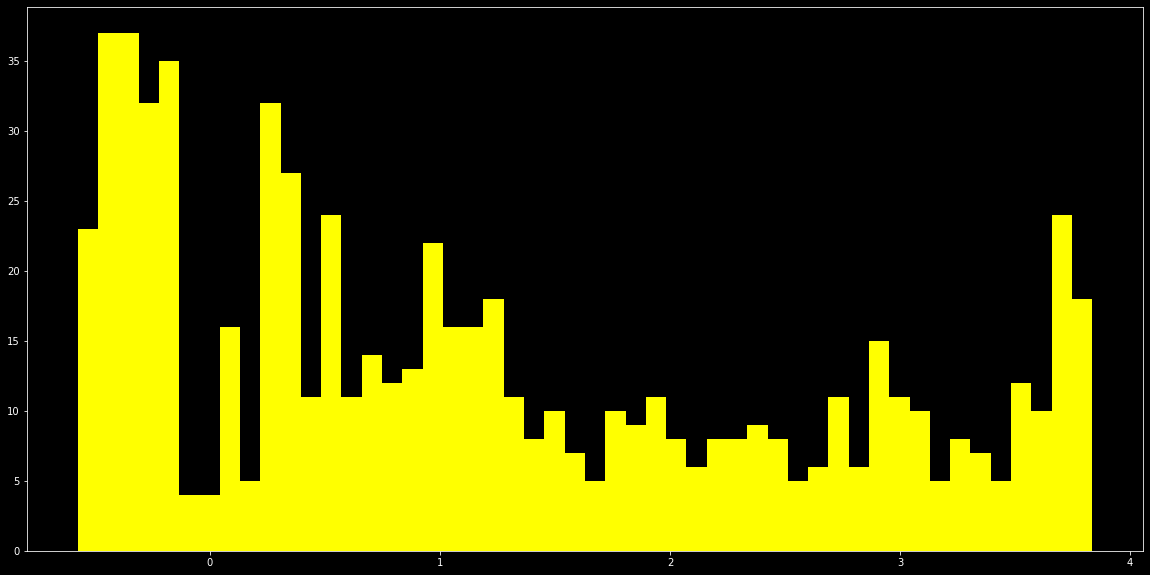

In [34]:
x, y = moving_average(data[0], data[1], 60)
cool_plot(x, y,  colour='cyan', label='Moving Average');
cool_plot(data[0],data[1], label = 'Data')
plt.show();

plt.hist(y, color = 'yellow', bins = 50);

/tmp/ipykernel_87990/3481305564.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='--', linewidth=0.25)


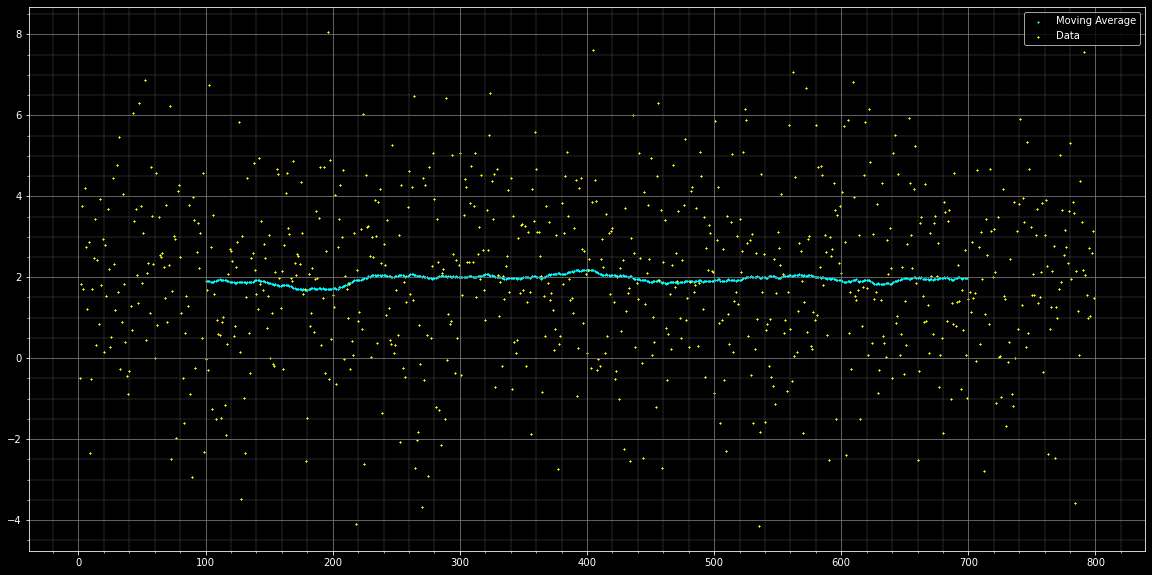

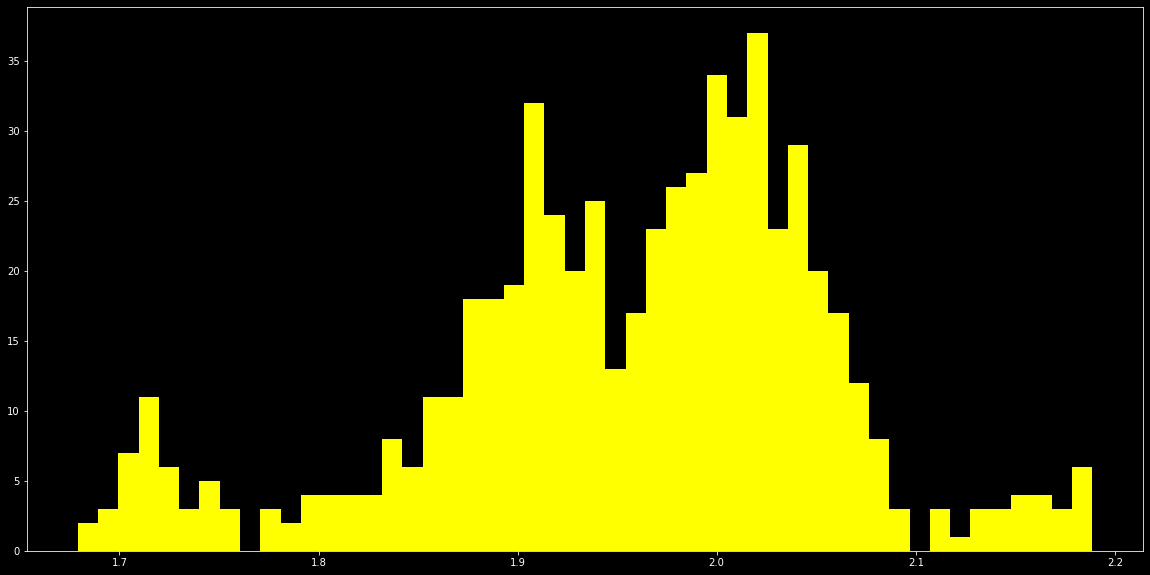

In [8]:
x, y = moving_average(noise_data[0], noise_data[1], 100)
cool_plot(x, y,  colour='cyan', label='Moving Average');
cool_plot(noise_data[0],noise_data[1], label = 'Data')
plt.show();

plt.hist(y, color = 'yellow', bins = 50);

In [17]:
noise_data

array([ 2.49662257e+00,  2.81628036e+00,  2.73858205e+00, -5.54982795e+00,
        3.82583954e+00,  6.35223267e-01, -1.93764192e+00,  4.42518892e+00,
        3.20263012e-01,  1.00005587e-01,  1.07220139e+00, -1.04540630e+00,
       -3.57101005e-01, -3.42175534e-01, -2.56827812e+00,  2.08470770e+00,
        3.67578340e-01, -2.73006225e-01,  4.05272699e+00,  6.52760089e-01,
       -1.47878418e+00, -3.56790098e-01,  9.22364478e-01,  1.95947487e+00,
       -9.16530648e-02, -1.83777324e-01, -5.78405517e-01,  1.95257527e+00,
        5.46264857e-01,  8.95945489e-02, -1.15389593e+00,  3.16203449e+00,
        5.73665951e-02,  1.13187028e-01,  1.56478980e+00,  2.41086095e+00,
       -3.51434677e+00, -2.62725054e-02, -3.70131022e-01,  6.35333060e-01,
       -3.02468109e+00, -1.14577455e+00,  6.11070069e-01, -7.82966395e-01,
       -4.51381306e-01,  2.25711267e+00,  2.58787062e+00,  1.44950214e+00,
        1.74957092e-01,  3.48790698e+00,  1.26470763e+00, -8.05214225e-01,
        8.10842042e-01, -

In [13]:
noise = 1 * np.random.randn(800)

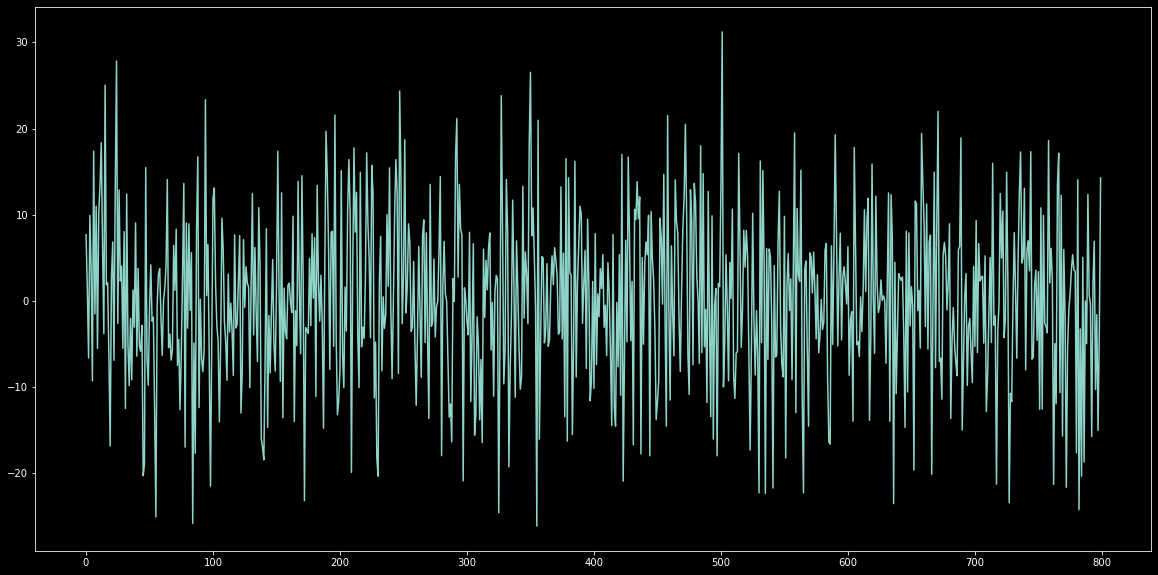

In [14]:
plt.plot(noise)